In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import mplcatppuccin

In [ ]:
plt.style.use("mocha")

In [ ]:
from mplsoccer import PyPizza, FontManager

In [ ]:
from typing import Tuple

# [CDAF] Atividade 2

## Nome e matrícula
Nome: Igor Lacerda Faria da Silva
Matrícula: 2020041973

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre estatísticas agregadas. Para esta atividade, usaremos dados do Brasileirão 2022 do FBRef.

## Questão 1
- Baixe o dataset de resultados em https://fbref.com/en/comps/24/2022/schedule/2022-Serie-A-Scores-and-Fixtures
- Crie uma média móvel de 5 jogos, para cada equipe, de cada uma das seguintes estatísticas: xG pró, xG contra, e dif. xG.
- Escolha 4 times para visualizar a série temporal das estatísticas acima. Uma visualização para cada uma das estatísticas, onde a média geral do campeonato é apresentada com uma linha pontilhada em conjunto com a média móvel dos times escolhidos.
- Interprete os resultados. O que isso pode indicar sobre a qualidade ofensiva e defensiva dos times escolhidos?

In [ ]:
df = pd.read_csv("./serie-a.csv")

In [ ]:
df = df.dropna()

In [1]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 405
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Wk            326 non-null    float64
 1   Day           326 non-null    object 
 2   Date          326 non-null    object 
 3   Time          326 non-null    object 
 4   Home          326 non-null    object 
 5   xG            326 non-null    float64
 6   Score         326 non-null    object 
 7   xG.1          326 non-null    float64
 8   Away          326 non-null    object 
 9   Attendance    326 non-null    float64
 10  Venue         326 non-null    object 
 11  Referee       326 non-null    object 
 12  Match Report  326 non-null    object 
dtypes: float64(4), object(9)
memory usage: 35.7+ KB


In [ ]:
df = df.drop(columns=["Referee", "Attendance", "Venue", "Match Report"])

In [2]:
df.head()

    Wk  Day        Date   Time              Home   xG Score  xG.1           Away
0  1.0  Sat  2022-04-09  16:30        Fluminense  1.6   0–0   0.1         Santos
1  1.0  Sat  2022-04-09  19:00    Atl Goianiense  1.4   1–1   1.2       Flamengo
2  1.0  Sun  2022-04-10  11:00          Coritiba  1.7   3–0   0.4          Goiás
3  1.0  Sun  2022-04-10  16:00  Atlético Mineiro  1.9   2–0   0.6  Internacional
4  1.0  Sun  2022-04-10  16:00     Botafogo (RJ)  1.5   1–3   2.1    Corinthians

In [ ]:
TEAMS = ["Fluminense", "Atlético Mineiro", "São Paulo", "Palmeiras"]

In [ ]:
WINDOW = 5

In [ ]:
expected_goals_global = df["xG"].rolling(WINDOW, min_periods=1).mean()
expected_goals_away_global = df["xG.1"].rolling(WINDOW, min_periods=1).mean()
diff_global = expected_goals_global.sub(expected_goals_away_global)

In [ ]:
dataTeam = Tuple[str, pd.Series, pd.Series, pd.Series]

In [ ]:
my_teams_data: list[dataTeam] = []
all_teams_data: list[dataTeam] = []

In [ ]:
all_teams = df["Home"].unique()
for team in all_teams:
    df_team = df.query(f"Home == '{team}' or Away == '{team}'")
    expected_team = df_team.apply(
        lambda x: x["xG"] if x["Home"] == team else x["xG.1"],
        axis=1,
    ).reset_index(drop=True)
    expected_team = expected_team.rolling(WINDOW, min_periods=1).mean()
    expected_away = df_team.apply(
        lambda x: x["xG.1"] if x["Home"] == team else x["xG"],
        axis=1,
    ).reset_index(drop=True)
    diff = expected_team - expected_away
    team_data = (team, expected_team, expected_away, diff)

    all_teams_data.append(team_data)

    if TEAMS.count(team) > 0:
        my_teams_data.append(team_data)

In [ ]:
# Dados gerais
expected = []
for series in zip(*[tup[1] for tup in all_teams_data]):
    item_mean = sum(series) / len(series)
    expected.append(item_mean)
away = []
for series in zip(*[tup[2] for tup in all_teams_data]):
    item_mean = sum(series) / len(series)
    away.append(item_mean)
diff = []
for series in zip(*[tup[3] for tup in all_teams_data]):
    item_mean = sum(series) / len(series)
    diff.append(item_mean)

In [ ]:
def plot_common():
    plt.ylabel("Gols")
    plt.xlabel("Jogo")
    plt.axhline(0, color="#cdd6f4", linestyle="--", linewidth=0.5)
    plt.axvline(0, color="#cdd6f4", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()

In [ ]:
def plot_metric(
    teams_data: list[dataTeam],
    name: str,
    general: list[float],
    index: int,
):
    plt.plot(general, label="Todos os times", linestyle="--")
    for team in teams_data:
        plt.plot(team[index], label=f"{name} {team[0]}")
    plot_common()

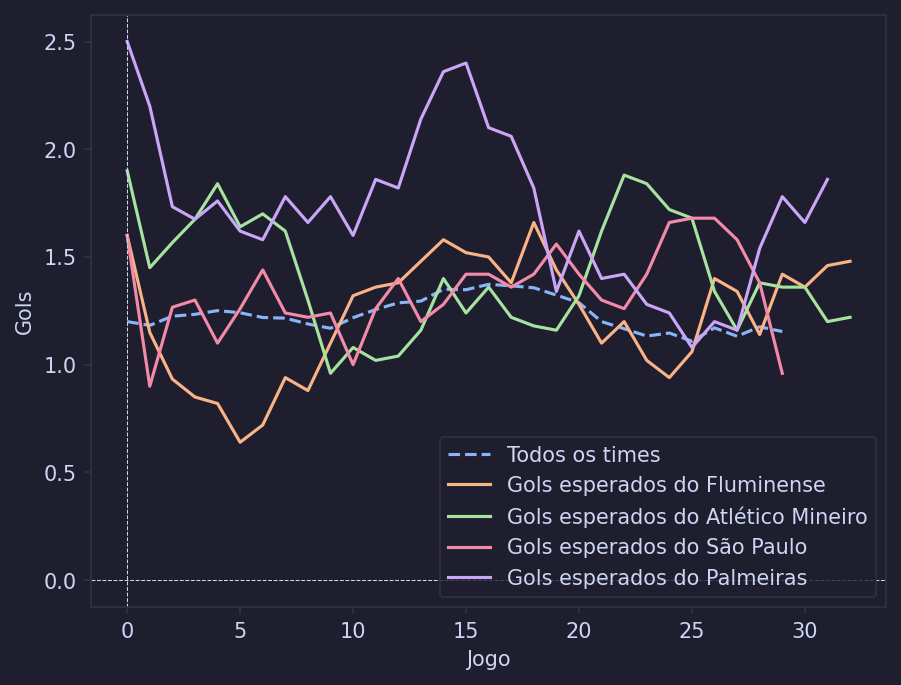

In [3]:
plot_metric(my_teams_data, "Gols esperados do", expected, 1)

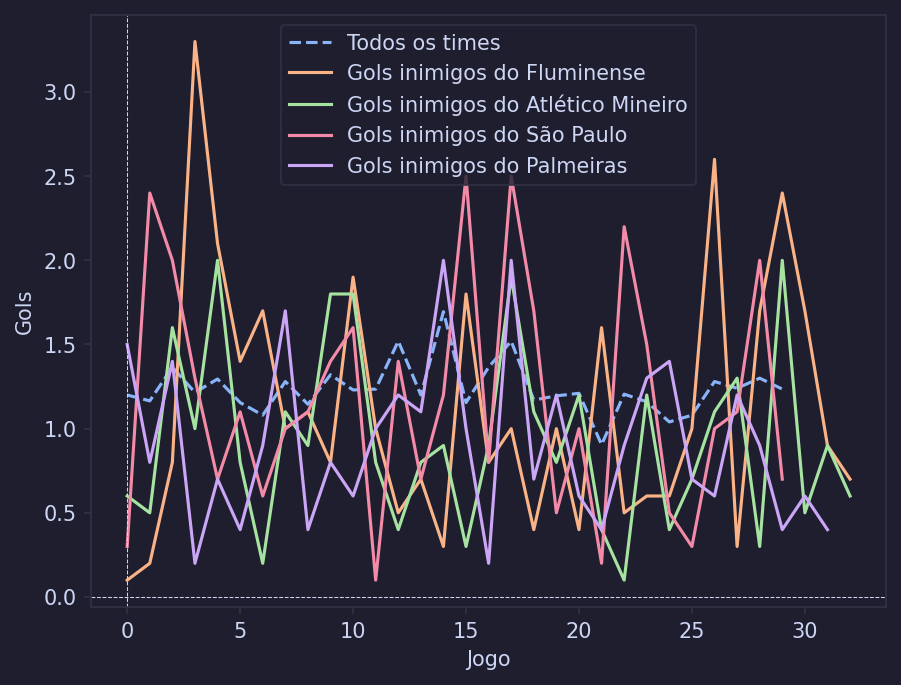

In [4]:
plot_metric(my_teams_data, "Gols inimigos do", away, 2)

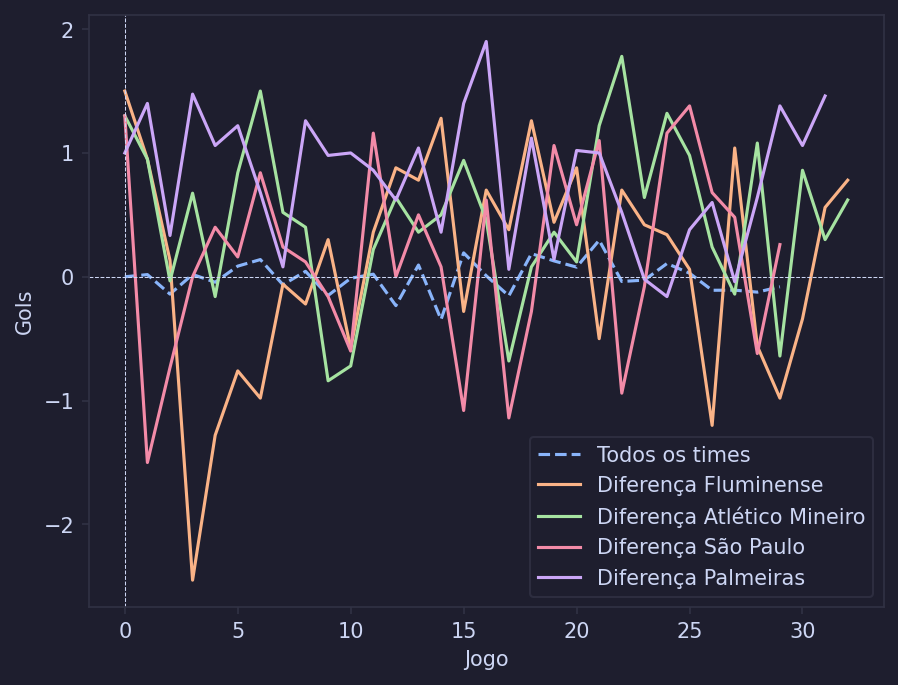

In [5]:
plot_metric(my_teams_data, "Diferença", diff, 3)